<a href="https://colab.research.google.com/github/rreghunandan/Credit-Card-Default-Prediction-/blob/main/Credit_Card_Default_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Credit card Default Prediction 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

import os 
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Importing dataset as "data"
df=pd.read_csv("/content/UCI_Credit_Card.csv")
df.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
5,6,50000.0,1,1,2,37,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
6,7,500000.0,1,1,2,29,0,0,0,0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
7,8,100000.0,2,2,2,23,0,-1,-1,0,...,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
8,9,140000.0,2,3,1,28,0,0,2,0,...,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0
9,10,20000.0,1,3,2,35,-2,-2,-2,-2,...,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0


In [5]:
df.shape

(30000, 25)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [72]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,166808.656000,1.603733,1.842267,1.557267,35.447167,-0.026433,-0.142767,-0.176533,-0.233867,-0.278433,...,42510.317067,39581.215733,38200.797233,5029.561633,5088.719567,4555.447400,4246.447100,4200.113300,4553.894133,0.221200
std,127584.472995,0.489129,0.744494,0.521405,9.090242,1.083593,1.164057,1.156639,1.113829,1.079821,...,60049.132356,56585.314536,55409.361537,9430.870444,10341.622162,9560.267421,9272.507135,9063.279373,11039.458690,0.415062
min,10000.000000,1.000000,1.000000,1.000000,22.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-212.020000,-232.010000,-331.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,833.000000,390.000000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2009.000000,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5000.000000,4505.000000,4013.250000,4031.500000,4000.000000,0.000000
max,500000.000000,2.000000,4.000000,3.000000,60.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,304997.270000,285868.330000,279505.060000,66522.180000,76651.020000,70000.000000,67054.440000,65607.560000,82619.050000,1.000000


Exploratory Data Analysis

In [7]:
# Distribution of defaults
df=df.rename(columns={'default.payment.next.month':'default'})
df.default.value_counts()

0    23364
1     6636
Name: default, dtype: int64

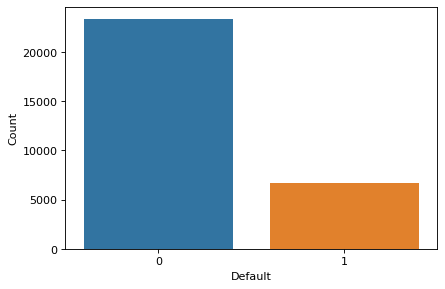

In [8]:
#Plotting deafult count 
plt.figure(dpi=80)
sns.countplot(x="default", data=df)
plt.xlabel("Default")
plt.ylabel("Count")
plt.show()

Percentage of Defaulters are smaller than the Non Defaulters in the given dataset

In [9]:
df2=df.copy()

In [10]:
#Renaming the sex column as 1-Male & 2-Female in df2
def sex1(x):
    if (x==1):
        return "Male"
    else:
        return "Female"
df2['SEX']=df['SEX'].apply(sex1)

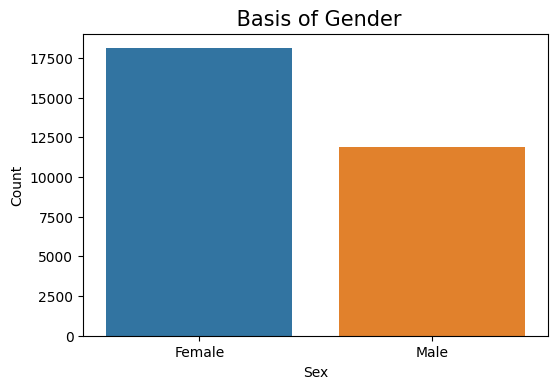

In [11]:
#Plotting Gender count
plt.figure(dpi=100)
df2.SEX.value_counts()
sns.countplot(x="SEX", data=df2)
plt.title(" Basis of Gender", size=15)
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

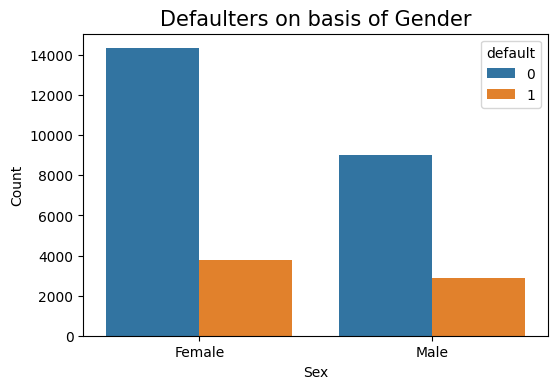

In [12]:
#Plotting Gender count
plt.figure(dpi=100)
df2.SEX.value_counts()
sns.countplot(x="SEX",hue="default", data=df2)
plt.title("Defaulters on basis of Gender", size=15)
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

The  credit card users percenatge is more among women and alos the non-deafulters are also relatively high in number among women

In [13]:
df2.EDUCATION.value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [14]:
def edu(x):
    if (x==0) or (x==5) or (x==6):
        x=4
    return x
df['EDUCATION']=df['EDUCATION'].apply(edu)
df2['EDUCATION']=df2['EDUCATION'].apply(edu)

In [15]:
def edu1(x):
    if (x==1):
        return "Graduate school"
    elif (x==2):
        return "University"
    elif (x==3):
        return "High School"
    else:
        return "Others"
df2['EDUCATION']=df2['EDUCATION'].apply(edu1)


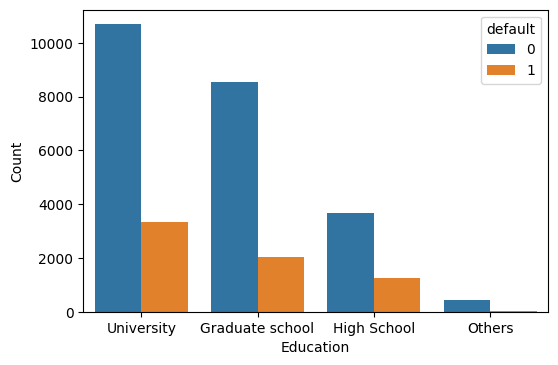

In [16]:
plt.figure(dpi=100)
df2.EDUCATION.value_counts()
sns.countplot(x="EDUCATION", hue="default", data=df2)
plt.xlabel("Education")
plt.ylabel("Count")
plt.show()

The graph shows defaulters are more among University degree holders followed by Grafuate school & high schoolers

In [17]:
df.MARRIAGE.value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [18]:
def marriage(x):
    if (x==0):
        x=3
    return x
df['MARRIAGE']=df['MARRIAGE'].apply(marriage)
df2['MARRIAGE']=df2['MARRIAGE'].apply(marriage)

In [19]:
def marriage1(x):
    if (x==1):
        return "Married"
    elif (x==2):
        return "Single"
    else:
        return "Others"
df2['MARRIAGE']=df2['MARRIAGE'].apply(marriage1)

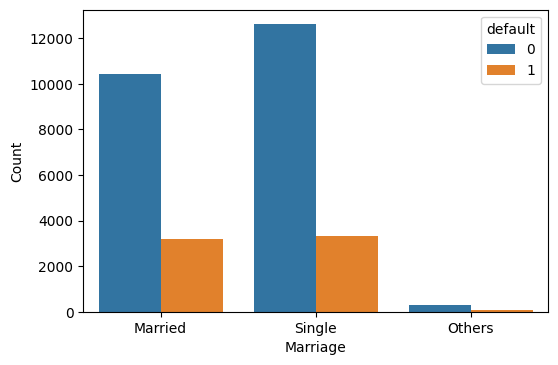

In [20]:
plt.figure(dpi=100)
df2.MARRIAGE.value_counts()
sns.countplot(x="MARRIAGE", hue="default", data=df2)
plt.xlabel("Marriage")
plt.ylabel("Count")
plt.show()

The default ration between Married & Single cutomers are almost same (only a negligible difference)

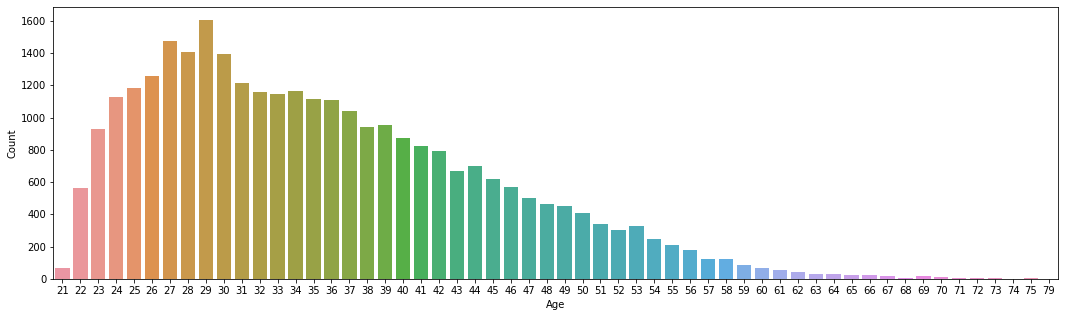

In [29]:
#df.AGE.value_counts()
plt.figure(figsize=(18,5))
age=df2['AGE'].value_counts().reset_index()
sns.barplot(x='index',y='AGE',data=age,orient='v')
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

In [30]:
# Dropping unnecessary column
df.drop(['ID'], axis=1, inplace=True)


In [31]:
#Handling Outlier
def outlier_capping(x):
    x=x.clip(upper=x.quantile(0.99))
    x=x.clip(lower=x.quantile(0.01))
    return x
df=df.apply(outlier_capping)
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000.0,2,2,1,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.00,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.00,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.00,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.00,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.00,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,3,1,39.0,0.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.00,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,150000.0,1,3,2,43.0,-1.0,-1.0,-1.0,-1.0,0.0,...,8979.0,5190.0,0.0,1837.00,3526.0,8998.0,129.0,0.0,0.0,0
29997,30000.0,1,2,2,37.0,3.0,3.0,2.0,-1.0,0.0,...,20878.0,20582.0,19357.0,0.00,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,80000.0,1,3,1,41.0,1.0,-1.0,0.0,0.0,0.0,...,52774.0,11855.0,48944.0,66522.18,3409.0,1178.0,1926.0,52964.0,1804.0,1


Feature Engineering

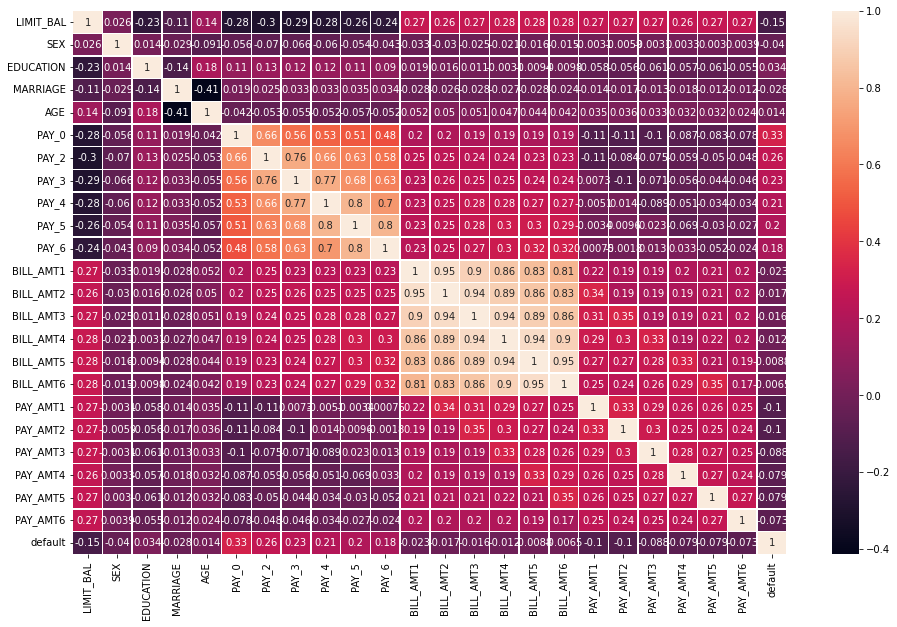

In [32]:
plt.figure (figsize= (16,10))
sns.heatmap(df.corr(),linewidths=.5,annot=True)
plt.show()

So it looks like the PAY_0, PAY_X variables are the strongest predictors of default, followed by the LIMIT_BAL and PAY_AMT_X variables.

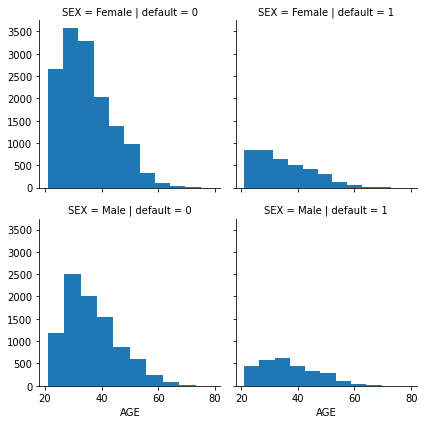

In [74]:
g = sns.FacetGrid(df2, col = 'default', row = 'SEX')
g.map(plt.hist, 'AGE')

From the above FaceGrid Plot we can see that NonDefaults have a higher proportion of people 30-40years

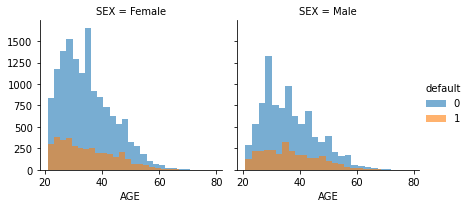

In [76]:
g = sns.FacetGrid(df2, col='SEX', hue='default')
g.map(plt.hist, 'AGE', alpha=0.6, bins=25) #alpha is for opacity
g.add_legend()

From the above FaceGrid Plot we can see that NonDefaults have a higher proportion of Female age between 30-40years

In [33]:
# One-hot encoding
df1=df.copy()
df1 = pd.get_dummies(df1, columns=["SEX"])
df1 = pd.get_dummies(df1, columns=["EDUCATION"])
df1 = pd.get_dummies(df1, columns=["MARRIAGE"])
df1

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,default,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,20000.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.0,3102.0,...,1,0,1,0,1,0,0,1,0,0
1,120000.0,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,1725.0,...,1,0,1,0,1,0,0,0,1,0
2,90000.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,14027.0,...,0,0,1,0,1,0,0,0,1,0
3,50000.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,48233.0,...,0,0,1,0,1,0,0,1,0,0
4,50000.0,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.0,5670.0,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,188948.0,192815.0,...,0,1,0,0,0,1,0,1,0,0
29996,150000.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,1683.0,1828.0,...,0,1,0,0,0,1,0,0,1,0
29997,30000.0,37.0,3.0,3.0,2.0,-1.0,0.0,0.0,3565.0,3356.0,...,1,1,0,0,1,0,0,0,1,0
29998,80000.0,41.0,1.0,-1.0,0.0,0.0,0.0,-1.0,-81.0,78379.0,...,1,1,0,0,0,1,0,1,0,0


# Splitting the data into train & test

In [34]:
from sklearn.model_selection import train_test_split, GridSearchCV
#Module related to calculation of metrics
from sklearn import metrics

from sklearn.preprocessing import StandardScaler, OneHotEncoder

import statsmodels.formula.api as smf

from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

from sklearn.linear_model import LogisticRegression, LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, LinearSVR, SVC, SVR
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB

In [35]:
target = df1[['default']]
features = df1.drop('default', axis=1)
data_final = pd.concat([features, target], axis=1)

In [36]:
#Splitting the data for sklearn methods
train_y, test_y, train_X, test_X = train_test_split(target,features, test_size=0.3, random_state=1)

In [37]:
train_X.shape

(21000, 29)

In [38]:
test_X.shape

(9000, 29)

# **Logistic Regression**

In [39]:
accuracy={}
model = LogisticRegression()
model.fit(train_X, train_y)


LogisticRegression()

In [40]:
train_pred = model.predict(train_X)
test_pred = model.predict(test_X)


In [41]:
roc=roc_auc_score(test_pred, test_y)
acc = accuracy_score(test_pred, test_y)
prec = precision_score(test_pred, test_y)
rec = recall_score(test_pred, test_y)
f1 = f1_score(test_pred, test_y)


In [42]:
results = pd.DataFrame([['Logistic Regression', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.777889,0.0015,0.6,0.002993,0.688994


In [43]:
print('\nAccuracy Score for model1(training): ', accuracy_score(train_pred, train_y))



Accuracy Score for model1(training):  0.7794285714285715


In [44]:
print('\nAccuracy Score for model1(testing): ', accuracy_score(test_pred, test_y))


Accuracy Score for model1(testing):  0.7778888888888889


# **KNN**

In [45]:
#Standardization of data
sc = StandardScaler()
std_data = sc.fit_transform(train_X)

In [46]:
std_data_train = pd.DataFrame(std_data, columns=train_X.columns, index = train_X.index )
std_data_test = pd.DataFrame(sc.transform(test_X), columns=test_X.columns, index = test_X.index )

In [47]:
#Using GridsearchCV with standrardized data
param_grid = {'n_neighbors':[3,4,5,6,7,8,9,10,11,12],
              'weights': ['uniform', 'distance']}
model = GridSearchCV(KNeighborsClassifier(), param_grid = param_grid, cv=5, scoring = 'f1_weighted')
model = model.fit(std_data_train, train_y)

In [48]:
model.best_score_

0.7816003994224644

In [49]:
model.best_params_

{'n_neighbors': 12, 'weights': 'distance'}

In [50]:
train_pred2 = model.predict(std_data_train)
test_pred2 = model.predict(std_data_test)

In [51]:
print('\nAccuracy Score for model2(training): ', accuracy_score(train_pred2, train_y))


Accuracy Score for model2(training):  0.9993333333333333


In [52]:
print('\nAccuracy Score for model2(testing): ', accuracy_score(test_pred2, test_y))



Accuracy Score for model2(testing):  0.8057777777777778


# Decision Tree

In [53]:
DT = DecisionTreeClassifier(criterion = 'entropy',random_state = 0,max_depth = 3, max_features=4,)

In [54]:
train_X = train_X[train_X.columns.difference(['pred_prob'])]
test_X = test_X[test_X.columns.difference(['pred_prob'])]
DT.fit( train_X, train_y )

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features=4,
                       random_state=0)

In [55]:
test_pred = DT.predict(test_X)

In [56]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_y, test_pred)

In [57]:
train_pred1 = DT.predict(train_X)
test_pred1 = DT.predict(test_X)

In [58]:
print(metrics.classification_report(train_y, train_pred1))
print('\nAccuracy Score for model3(training): ', accuracy_score(train_pred1, train_y))


              precision    recall  f1-score   support

           0       0.82      0.96      0.89     16364
           1       0.66      0.25      0.36      4636

    accuracy                           0.81     21000
   macro avg       0.74      0.61      0.62     21000
weighted avg       0.78      0.81      0.77     21000


Accuracy Score for model3(training):  0.8063333333333333


In [59]:
print(metrics.classification_report(test_y, test_pred1))
print('\nAccuracy Score for model3(testing): ', accuracy_score(test_pred1, test_y))

              precision    recall  f1-score   support

           0       0.82      0.97      0.88      7000
           1       0.67      0.24      0.36      2000

    accuracy                           0.80      9000
   macro avg       0.74      0.60      0.62      9000
weighted avg       0.78      0.80      0.77      9000


Accuracy Score for model3(testing):  0.8048888888888889


# **Naive Bayes**

In [60]:
nb_clf = GaussianNB()
nb_clf.fit(train_X, train_y)

GaussianNB()

In [61]:
train_pred4=nb_clf.predict(train_X)
test_pred4=nb_clf.predict(test_X)

In [62]:
print(metrics.classification_report(train_y, train_pred4))
print('\nAccuracy Score for model4(training): ', accuracy_score(train_pred4, train_y))


              precision    recall  f1-score   support

           0       0.86      0.36      0.51     16364
           1       0.26      0.80      0.39      4636

    accuracy                           0.46     21000
   macro avg       0.56      0.58      0.45     21000
weighted avg       0.73      0.46      0.48     21000


Accuracy Score for model4(training):  0.4561428571428571


In [63]:
print(metrics.classification_report(test_y, test_pred4))
print('\nAccuracy Score for model4(testing): ', accuracy_score(train_pred4, train_y))

              precision    recall  f1-score   support

           0       0.87      0.36      0.51      7000
           1       0.26      0.81      0.40      2000

    accuracy                           0.46      9000
   macro avg       0.57      0.58      0.45      9000
weighted avg       0.73      0.46      0.48      9000


Accuracy Score for model4(testing):  0.4561428571428571


# **Random Forest**

In [64]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
radm_clf = RandomForestClassifier(oob_score=True,n_estimators=100 , max_depth = 10, max_features=4, n_jobs=-1,criterion = 'entropy')
radm_clf.fit( train_X, train_y )

RandomForestClassifier(criterion='entropy', max_depth=10, max_features=4,
                       n_jobs=-1, oob_score=True)

In [66]:
train_pred5=radm_clf.predict(train_X)
test_pred5=radm_clf.predict(test_X)

In [67]:
print(metrics.classification_report(train_y, train_pred5))
print('\nAccuracy Score for model5(training): ', accuracy_score(train_pred5, train_y))


              precision    recall  f1-score   support

           0       0.86      0.97      0.91     16364
           1       0.83      0.44      0.58      4636

    accuracy                           0.86     21000
   macro avg       0.85      0.71      0.75     21000
weighted avg       0.85      0.86      0.84     21000


Accuracy Score for model5(training):  0.8569523809523809


In [68]:
print(metrics.classification_report(test_y, test_pred5))
print('\nAccuracy Score for model5(testing): ', accuracy_score(test_pred5, test_y))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7000
           1       0.68      0.34      0.46      2000

    accuracy                           0.82      9000
   macro avg       0.76      0.65      0.67      9000
weighted avg       0.80      0.82      0.80      9000


Accuracy Score for model5(testing):  0.819


# Plotting all Algorithums used

In [69]:
lr=accuracy_score(test_pred, test_y)*100
knn=accuracy_score(test_pred2, test_y)*100
dt=accuracy_score(test_pred1, test_y)*100
rf=accuracy_score(test_pred5, test_y)*100
nb=accuracy_score(test_pred4, test_y)*100

lr1=accuracy_score(train_pred, train_y)*100
knn1=accuracy_score(train_pred2, train_y)*100
dt1=accuracy_score(train_pred1, train_y)*100
rf1=accuracy_score(train_pred5, train_y)*100
nb1=accuracy_score(train_pred4, train_y)*100

In [70]:
dict_train={"Logistic Regression":lr1, "KNN":knn1, "Decision Tree":dt1, "Random Forest":rf1, "Naive Bayes":nb1}
dict_test={"Logistic Regression":lr, "KNN":knn, "Decision Tree":dt, "Random Forest":rf, "Naive Bayes":nb}


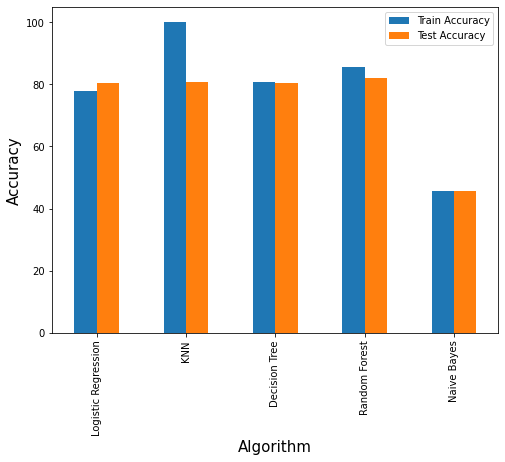

In [71]:
plot1=pd.DataFrame([dict_train,dict_test], index=['Train Accuracy','Test Accuracy']).transpose()

plot1.plot(kind='bar',figsize=(8,6))
plt.xlabel("Algorithm",fontsize=15)
plt.ylabel("Accuracy",fontsize=15)
plt.show()

The strongest predictors of default are the PAY_X (ie the repayment status in previous months), the LIMIT_BAL & the PAY_AMTX (amount paid in previous months).

